 Looking to find the most expensive metro areas by median home price in the US.
 
Context

Zillow has a lot of data about housing prices in America.

Content

Data about housing prices and rental prices broken down according to city and state and number of bedrooms. More detail can be found at https://www.zillow.com/research/data/ and at https://www.zillow.com/research/home-sales-methodology-7733/.

Acknowledgements

The data was downloaded from https://www.zillow.com/research/data/. Banner photo from Ian Keefe on Unsplash. Dataset license described at https://www.zillow.com/research/data/.

In [1]:
#data organization and upload
import numpy as np
import pandas as pd

#visualizations
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

#setting filter warnings to ignore to keep our notebook clean
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("City_Zhvi_2bedroom.csv")

In [3]:
data.head()

,Unnamed: 0,RegionID,RegionName,State,Metro,CountyName,SizeRank,2008-01,2008-02,2008-03,...,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11
0,0,6181,New York,NY,New York-Newark-Jersey City,Queens County,1,576827.0,576551.0,575294.000000,...,755775.000000,755544.000000,755377.333333,755510.333333,754488.666667,753482.666667,751084.000000,747943.000000,745139.333333,743173.333333
1,1,12447,Los Angeles,CA,Los Angeles-Long Beach-Anaheim,Los Angeles County,2,NaN,NaN,NaN,...,599677.666667,598162.333333,598823.000000,600231.000000,603184.333333,607904.666667,613860.000000,620111.666667,623957.333333,626501.666667
2,2,39051,Houston,TX,Houston-The Woodlands-Sugar Land,Harris County,3,97050.0,96793.5,96671.666667,...,135923.000000,136778.666667,137111.666667,137613.666667,138303.000000,138913.333333,139524.000000,139964.666667,140836.000000,140799.000000
3,3,17426,Chicago,IL,Chicago-Naperville-Elgin,Cook County,4,NaN,NaN,NaN,...,226506.333333,226949.666667,227951.000000,228515.333333,228289.000000,227479.666667,226601.333333,225887.333333,225615.666667,225706.000000
4,4,6915,San Antonio,TX,San Antonio-New Braunfels,Bexar County,5,80354.0,80612.0,80738.666667,...,116293.333333,117501.000000,118332.666667,118989.666667,119935.333333,120798.000000,121715.000000,122682.000000,122805.666667,122679.000000


In [4]:
columns = list(data.columns)
columns = columns[1:]

In [5]:
df =data[columns]
df.head()

,RegionID,RegionName,State,Metro,CountyName,SizeRank,2008-01,2008-02,2008-03,2008-04,...,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11
0,6181,New York,NY,New York-Newark-Jersey City,Queens County,1,576827.0,576551.0,575294.000000,573466.333333,...,755775.000000,755544.000000,755377.333333,755510.333333,754488.666667,753482.666667,751084.000000,747943.000000,745139.333333,743173.333333
1,12447,Los Angeles,CA,Los Angeles-Long Beach-Anaheim,Los Angeles County,2,NaN,NaN,NaN,NaN,...,599677.666667,598162.333333,598823.000000,600231.000000,603184.333333,607904.666667,613860.000000,620111.666667,623957.333333,626501.666667
2,39051,Houston,TX,Houston-The Woodlands-Sugar Land,Harris County,3,97050.0,96793.5,96671.666667,96087.000000,...,135923.000000,136778.666667,137111.666667,137613.666667,138303.000000,138913.333333,139524.000000,139964.666667,140836.000000,140799.000000
3,17426,Chicago,IL,Chicago-Naperville-Elgin,Cook County,4,NaN,NaN,NaN,213804.000000,...,226506.333333,226949.666667,227951.000000,228515.333333,228289.000000,227479.666667,226601.333333,225887.333333,225615.666667,225706.000000
4,6915,San Antonio,TX,San Antonio-New Braunfels,Bexar County,5,80354.0,80612.0,80738.666667,80994.333333,...,116293.333333,117501.000000,118332.666667,118989.666667,119935.333333,120798.000000,121715.000000,122682.000000,122805.666667,122679.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19552 entries, 0 to 19551
Columns: 149 entries, RegionID to 2019-11
dtypes: float64(143), int64(2), object(4)
memory usage: 22.2+ MB


In [7]:
len(df.RegionID.unique())

19552

In [8]:
len(df.Metro.unique())

850

Monthly data from Jan 2008 to November 2019.  142 months, 19,551 cities or towns and 850 metro areas

deal with nans - first in metro

In [9]:
metro_df = df.copy()
metro_df.fillna(0,inplace=True)

In [10]:
metro_df.iloc[:,:6].isna().sum()

RegionID      0
RegionName    0
State         0
Metro         0
CountyName    0
SizeRank      0
dtype: int64

In [11]:
print("{}% loss of data".format(round((4350/19551)*100,2)))

22.25% loss of data


ouch but some cities dont have metros believe it or not.  so Even though there is a big loss i think its the right move to drop



In [12]:
metro_df.iloc[:,:6].isna().sum()

RegionID      0
RegionName    0
State         0
Metro         0
CountyName    0
SizeRank      0
dtype: int64

In [13]:
metro_df.Metro[metro_df.Metro == 0].count()

4350

In [14]:
metro_df.drop(metro_df.index[metro_df.Metro ==0], inplace = True)


In [15]:
metro_df.head()

,RegionID,RegionName,State,Metro,CountyName,SizeRank,2008-01,2008-02,2008-03,2008-04,...,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11
0,6181,New York,NY,New York-Newark-Jersey City,Queens County,1,576827.0,576551.0,575294.000000,573466.333333,...,755775.000000,755544.000000,755377.333333,755510.333333,754488.666667,753482.666667,751084.000000,747943.000000,745139.333333,743173.333333
1,12447,Los Angeles,CA,Los Angeles-Long Beach-Anaheim,Los Angeles County,2,0.0,0.0,0.000000,0.000000,...,599677.666667,598162.333333,598823.000000,600231.000000,603184.333333,607904.666667,613860.000000,620111.666667,623957.333333,626501.666667
2,39051,Houston,TX,Houston-The Woodlands-Sugar Land,Harris County,3,97050.0,96793.5,96671.666667,96087.000000,...,135923.000000,136778.666667,137111.666667,137613.666667,138303.000000,138913.333333,139524.000000,139964.666667,140836.000000,140799.000000
3,17426,Chicago,IL,Chicago-Naperville-Elgin,Cook County,4,0.0,0.0,0.000000,213804.000000,...,226506.333333,226949.666667,227951.000000,228515.333333,228289.000000,227479.666667,226601.333333,225887.333333,225615.666667,225706.000000
4,6915,San Antonio,TX,San Antonio-New Braunfels,Bexar County,5,80354.0,80612.0,80738.666667,80994.333333,...,116293.333333,117501.000000,118332.666667,118989.666667,119935.333333,120798.000000,121715.000000,122682.000000,122805.666667,122679.000000


In [16]:
metro_df.iloc[:,:6].isna().sum()

RegionID      0
RegionName    0
State         0
Metro         0
CountyName    0
SizeRank      0
dtype: int64

In [17]:
metro_df = metro_df.iloc[:,1:]

In [18]:
metro_df.head()

,RegionName,State,Metro,CountyName,SizeRank,2008-01,2008-02,2008-03,2008-04,2008-05,...,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11
0,New York,NY,New York-Newark-Jersey City,Queens County,1,576827.0,576551.0,575294.000000,573466.333333,569521.0,...,755775.000000,755544.000000,755377.333333,755510.333333,754488.666667,753482.666667,751084.000000,747943.000000,745139.333333,743173.333333
1,Los Angeles,CA,Los Angeles-Long Beach-Anaheim,Los Angeles County,2,0.0,0.0,0.000000,0.000000,0.0,...,599677.666667,598162.333333,598823.000000,600231.000000,603184.333333,607904.666667,613860.000000,620111.666667,623957.333333,626501.666667
2,Houston,TX,Houston-The Woodlands-Sugar Land,Harris County,3,97050.0,96793.5,96671.666667,96087.000000,95375.0,...,135923.000000,136778.666667,137111.666667,137613.666667,138303.000000,138913.333333,139524.000000,139964.666667,140836.000000,140799.000000
3,Chicago,IL,Chicago-Naperville-Elgin,Cook County,4,0.0,0.0,0.000000,213804.000000,215913.0,...,226506.333333,226949.666667,227951.000000,228515.333333,228289.000000,227479.666667,226601.333333,225887.333333,225615.666667,225706.000000
4,San Antonio,TX,San Antonio-New Braunfels,Bexar County,5,80354.0,80612.0,80738.666667,80994.333333,80945.0,...,116293.333333,117501.000000,118332.666667,118989.666667,119935.333333,120798.000000,121715.000000,122682.000000,122805.666667,122679.000000


In [19]:
df_prices = pd.DataFrame(columns =['region', 'state', 'metro','size_rank','mean'])

In [20]:
df_prices.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 5 columns):
region       0 non-null object
state        0 non-null object
metro        0 non-null object
size_rank    0 non-null object
mean         0 non-null object
dtypes: object(5)
memory usage: 0.0+ bytes


In [21]:
df_prices.region = metro_df.RegionName
df_prices.state = metro_df.State
df_prices.metro = metro_df.Metro
df_prices.size_rank = metro_df.SizeRank

In [22]:
means = []
for i in range(len(df_prices.region)):
    val = np.mean(metro_df.iloc[i,6:])
    means.append(val)
df_prices['mean'] = means

In [23]:
df_prices.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15202 entries, 0 to 19551
Data columns (total 5 columns):
region       15202 non-null object
state        15202 non-null object
metro        15202 non-null object
size_rank    15202 non-null int64
mean         15202 non-null float64
dtypes: float64(1), int64(1), object(3)
memory usage: 712.6+ KB


food for thought - use the mean or median of the median home prices.  

In [24]:
metros = list(df_prices.metro.unique())

In [25]:
metro_dict = {}
for msa in metros:        
    metro_dict[msa]= np.mean(df_prices[df_prices.metro==msa])

In [26]:
metro_dict['New York-Newark-Jersey City']

size_rank      5893.636511
mean         314474.951721
dtype: float64

find the top - plot circle for median price with city size as the other dimension?  plot scatter/line/bar? where each dot is a city and the height of the dot is the median price?  create a sorted list high to low? 

consider finding the median income for each msa and comparing that vs. median price to arrive at true affordability of home ownership

In [27]:
mean_metro = {}

for msa in metros:
    mean_metro[msa]= round(metro_dict[msa][1],2)

In [28]:
mean_metro['New York-Newark-Jersey City']

314474.95

In [29]:
msa_price = pd.DataFrame(columns = ['MSA','MeanPrice'])


In [30]:
msa_price.MSA = mean_metro.keys()
msa_price.MeanPrice = mean_metro.values()

In [31]:
msa_price.head()

,MSA,MeanPrice
0,New York-Newark-Jersey City,314474.95
1,Los Angeles-Long Beach-Anaheim,369116.05
2,Houston-The Woodlands-Sugar Land,107003.34
3,Chicago-Naperville-Elgin,133582.97
4,San Antonio-New Braunfels,140443.56


In [32]:
msa_mean_sort =msa_price.sort_values(by = ['MeanPrice'], ascending=False)

In [33]:
msa_mean_sort.reset_index(inplace=True)
msa_mean_sort.drop(columns = ['index'], inplace = True)

In [34]:
msa_mean_sort.head(10)

,MSA,MeanPrice
0,San Jose-Sunnyvale-Santa Clara,643333.35
1,Port St. Lucie,574089.90
2,Vineyard Haven,545349.88
3,Kapaa,499137.71
4,San Francisco-Oakland-Hayward,457746.34
5,Kahului-Wailuku-Lahaina,429485.62
6,Santa Maria-Santa Barbara,423260.87
7,Los Angeles-Long Beach-Anaheim,369116.05
8,Urban Honolulu,354167.97
9,Salinas,341460.01


In [35]:
sns.set_style('whitegrid')

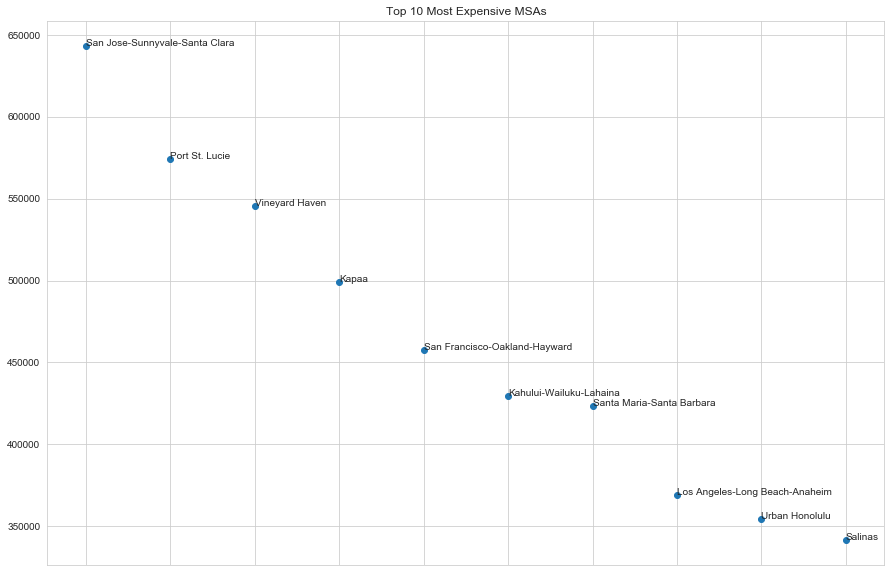

In [36]:
fig, ax = plt.subplots(figsize=(15,10))
x = msa_mean_sort.MSA[:10]
y = msa_mean_sort.MeanPrice[:10]
labels =x
ax.scatter(x, y,label =labels)
for i, txt in enumerate(labels):
    ax.annotate(txt, (x[i], y[i]))
ax.xaxis.set_ticklabels([])
ax.set_title('Top 10 Most Expensive MSAs')
plt.show()

 5 in CA
 3 in HI
 1 in MA (marthas vineyard)
 1 in FL (Jupiter island)
 
 do the same thing but weight the plot on the size of the city rank

In [37]:
s = [metro_dict[msa][0]for msa in labels]

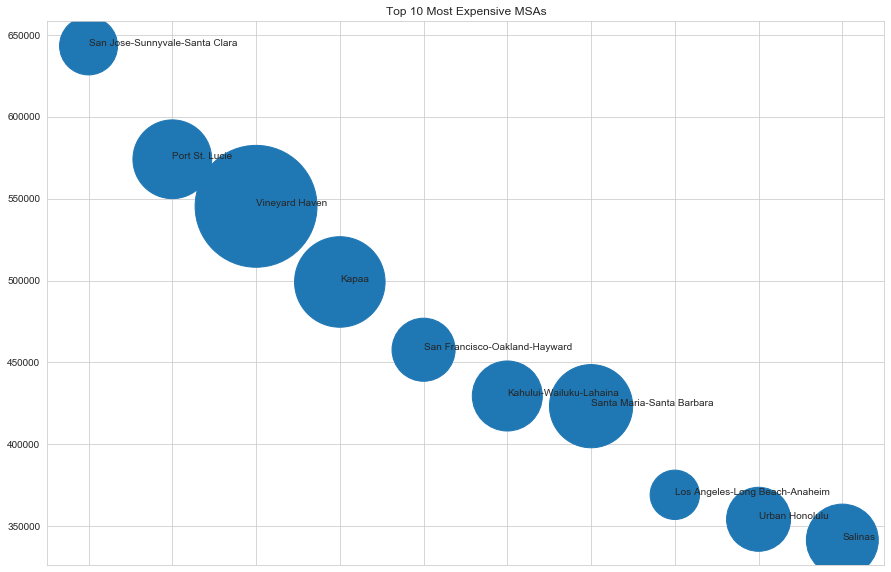

In [38]:
fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(x, y,label =labels, s=s)
for i, txt in enumerate(labels):
    ax.annotate(txt, (x[i], y[i]))
ax.xaxis.set_ticklabels([])
ax.set_title('Top 10 Most Expensive MSAs')
plt.show()

need income data to create a true visual of expensiveness

In [82]:
inc_data = pd.read_csv("percapita_msa.csv")

In [83]:
inc_data.head()

,Msa,2016_dollars,2017_dollars,2018_dollars,Rank_2018,Percent_change_2017,Percent_change_2018,Percent_rank_2018,Unnamed: 8
0,United States,"49,870","51,885","54,446",--,4.0,4.9,--,NaN
1,Metropolitan portion,"51,742","53,864","56,527",--,4.1,4.9,--,NaN
2,Nonmetropolitan portion,"38,422","39,690","41,552",--,3.3,4.7,--,NaN
3,Metropolitan Statistical Areas2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Abilene, TX","40,140","40,862","43,140",256,1.8,5.6,57,NaN


there are some basic summary stats in the file that are useful to look at for now but we can get rid of tehm for our analysis.

lets clean the dataframe up a bit

In [84]:
df_inc = inc_data

In [85]:
df_inc.drop([0,1,2,3], inplace=True)

In [86]:
df_inc.head()

,Msa,2016_dollars,2017_dollars,2018_dollars,Rank_2018,Percent_change_2017,Percent_change_2018,Percent_rank_2018,Unnamed: 8
4,"Abilene, TX","40,140","40,862","43,140",256,1.8,5.6,57,NaN
5,"Akron, OH","45,515","47,343","49,423",129,4.0,4.4,211,NaN
6,"Albany, GA","35,485","36,522","37,500",358,2.9,2.7,374,NaN
7,"Albany-Lebanon, OR","39,164","40,865","42,891",261,4.3,5.0,113,NaN
8,"Albany-Schenectady-Troy, NY","53,496","56,264","58,104",43,5.2,3.3,349,NaN


In [87]:
df_inc.reset_index(inplace=True)
df_inc.head()

,index,Msa,2016_dollars,2017_dollars,2018_dollars,Rank_2018,Percent_change_2017,Percent_change_2018,Percent_rank_2018,Unnamed: 8
0,4,"Abilene, TX","40,140","40,862","43,140",256,1.8,5.6,57,NaN
1,5,"Akron, OH","45,515","47,343","49,423",129,4.0,4.4,211,NaN
2,6,"Albany, GA","35,485","36,522","37,500",358,2.9,2.7,374,NaN
3,7,"Albany-Lebanon, OR","39,164","40,865","42,891",261,4.3,5.0,113,NaN
4,8,"Albany-Schenectady-Troy, NY","53,496","56,264","58,104",43,5.2,3.3,349,NaN


In [88]:
df_inc.drop(['index','Unnamed: 8'],axis=1, inplace=True)
df_inc.head()

,Msa,2016_dollars,2017_dollars,2018_dollars,Rank_2018,Percent_change_2017,Percent_change_2018,Percent_rank_2018
0,"Abilene, TX","40,140","40,862","43,140",256,1.8,5.6,57
1,"Akron, OH","45,515","47,343","49,423",129,4.0,4.4,211
2,"Albany, GA","35,485","36,522","37,500",358,2.9,2.7,374
3,"Albany-Lebanon, OR","39,164","40,865","42,891",261,4.3,5.0,113
4,"Albany-Schenectady-Troy, NY","53,496","56,264","58,104",43,5.2,3.3,349
